# Lung Cancer Prediction

## Import Dependencies

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Preprocessing

In [20]:
df = pd.read_csv('../data/cancer patient data sets.csv', index_col=0)

In [21]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [10]:
df1 = df.drop('Patient Id', axis=1)

In [11]:
df1.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [15]:
df1.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


## Label Encoding

In [31]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [32]:
df1['Level'] = labelencoder.fit_transform(df1['Level'])

In [33]:
df1.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,0
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,0
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,0


## Feature Selection

In [34]:
corr_mat = df1.corr(numeric_only=True)

In [37]:
corr_mat.shape

(25, 25)

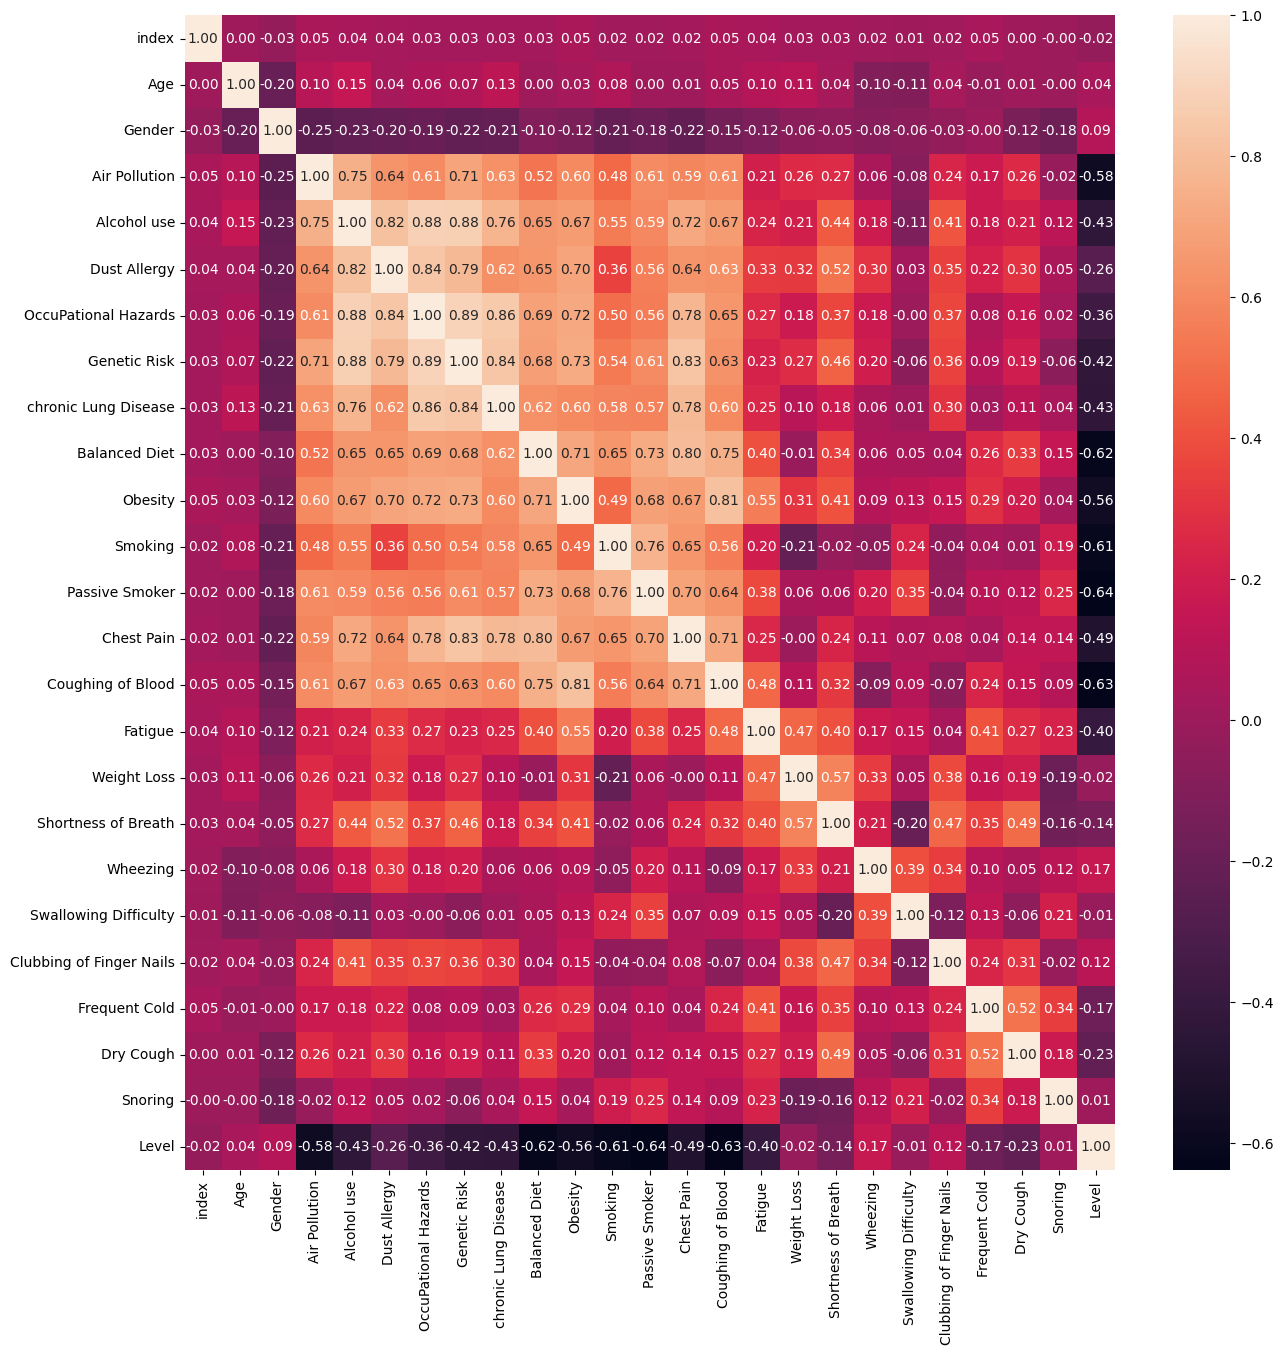

In [35]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

In [41]:
corr_mat.iloc[24, 1]

np.float64(0.04263102789014862)

In [45]:
df1.columns[24]

'Level'

In [63]:
# Selecting independent features to train model and make predictions from.
def select_features(df:'pandas.core.frame.DataFrame', target_feature:int, lower_threshold:float, upper_threshold:float) -> dict:
    selected_features = dict()
    corr_matrix = df1.corr(numeric_only=True)
    # iterate over the correlation values of features with the target feature
    for i in range(corr_matrix.shape[0] - 1):
        corr_val = corr_matrix.iloc[target_feature, i]

        if corr_val <= lower_threshold or corr_val >= upper_threshold: 
            selected_features[df.columns[i]] = float(round(corr_val, 4))
        else:
            continue
            
    return selected_features

In [64]:
# corr threshold = [-1.0, -0.2] U [0.2, 1.0]
features = select_features(df1, 24, -0.2, 0.2)

In [65]:
X = df1[features.keys()]
Y = df1['Level']

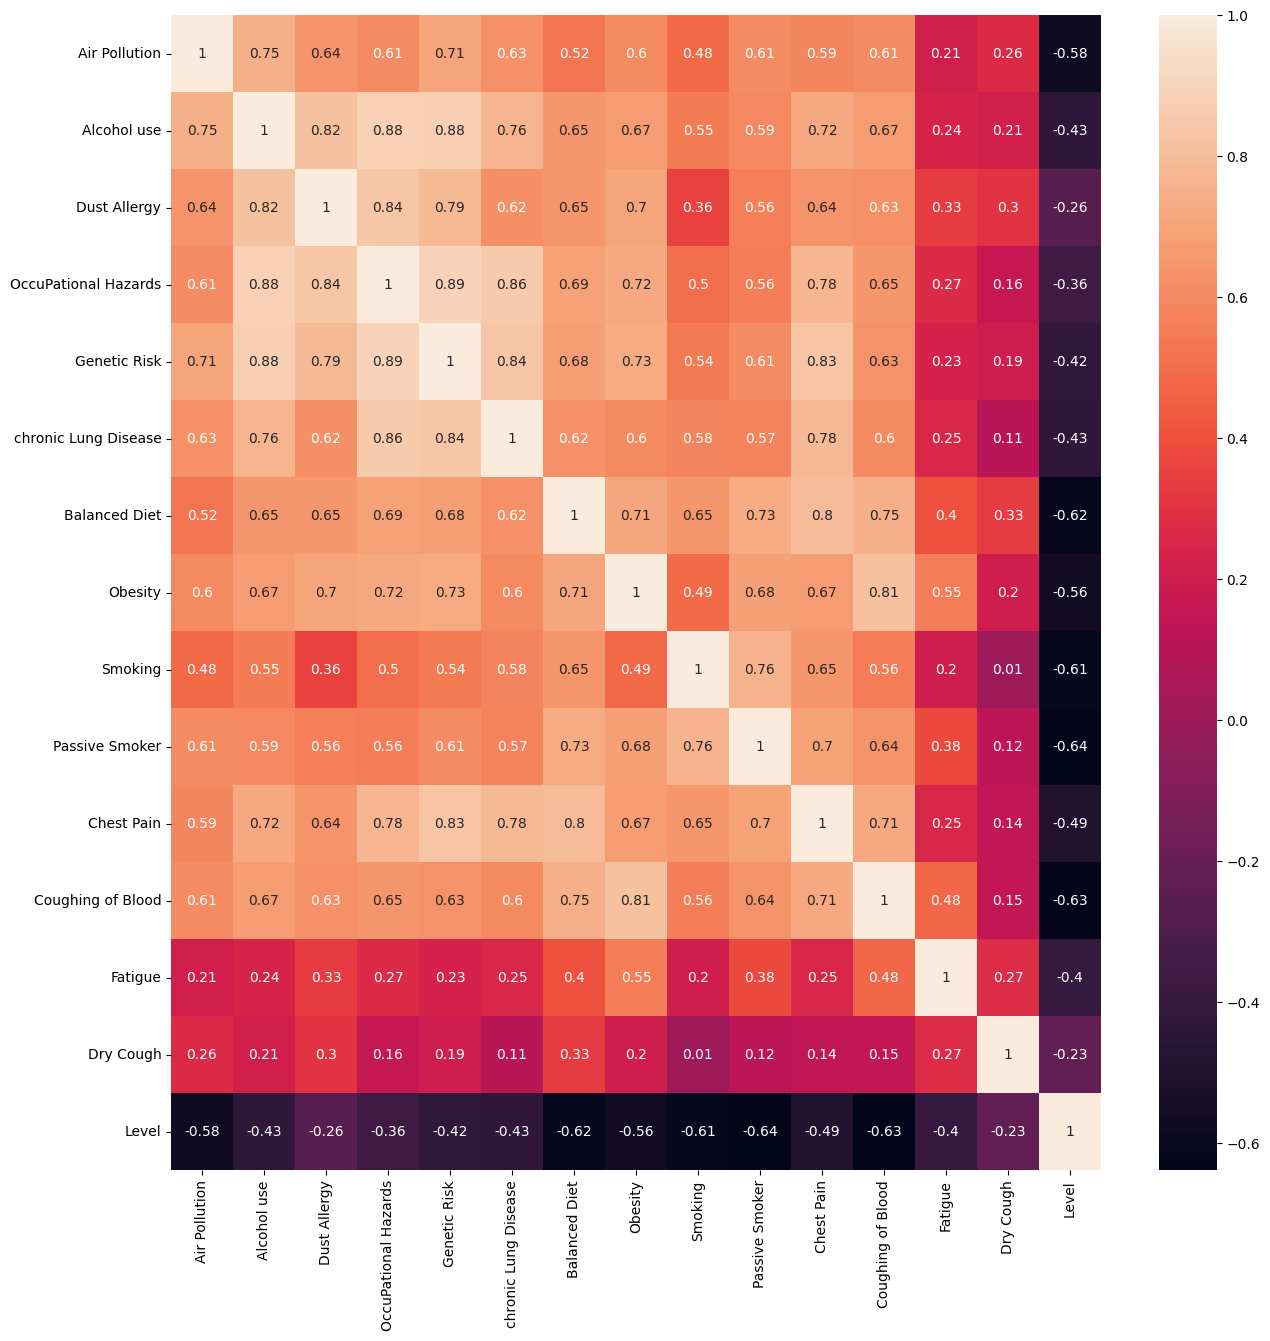

In [73]:
x_corr = X.join(Y).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(x_corr, annot=True)
plt.show()

## Scaling

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [86]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

## Model Selection and Training

In [91]:
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
linear_svc = LinearSVC()
svc = SVC()
rfr = RandomForestClassifier()
lr = LogisticRegression()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

In [93]:
linear_svc.fit(x_train_scaled, y_train)
svc.fit(x_train_scaled, y_train)
rfr.fit(x_train_scaled, y_train)
lr.fit(x_train_scaled, y_train)
knc.fit(x_train_scaled, y_train)
dtc.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [94]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [95]:
lin_svc_preds = linear_svc.predict(x_test_scaled)
svc_preds = svc.predict(x_test_scaled)
rfr_preds = rfr.predict(x_test_scaled)
lr_preds = lr.predict(x_test_scaled)
knc_preds = knc.predict(x_test_scaled)
dtc_preds = dtc.predict(x_test_scaled)

In [96]:
lin_svc_acc = accuracy_score(y_test, lin_svc_preds)
svc_acc = accuracy_score(y_test, svc_preds)
rfr_acc = accuracy_score(y_test, rfr_preds)
lr_acc = accuracy_score(y_test, lr_preds)
knc_acc = accuracy_score(y_test, knc_preds)
dtc_acc = accuracy_score(y_test, dtc_preds)

In [97]:
print(f'Linear SVC Accuracy: {lin_svc_acc * 100} %')
print(f'SVC Accuracy: {svc_acc * 100} %')
print(f'RFR Accuracy: {rfr_acc * 100} %')
print(f'LR Prediction Accuracy: {lr_acc * 100} %')
print(f'KNC Prediction Accuracy: {knc_acc * 100} %')
print(f'DTC Prediction Accuracy: {dtc_acc * 100} %')

Linear SVC Accuracy: 93.2 %
SVC Accuracy: 100.0 %
RFR Accuracy: 100.0 %
LR Prediction Accuracy: 93.2 %
KNC Prediction Accuracy: 100.0 %
DTC Prediction Accuracy: 100.0 %


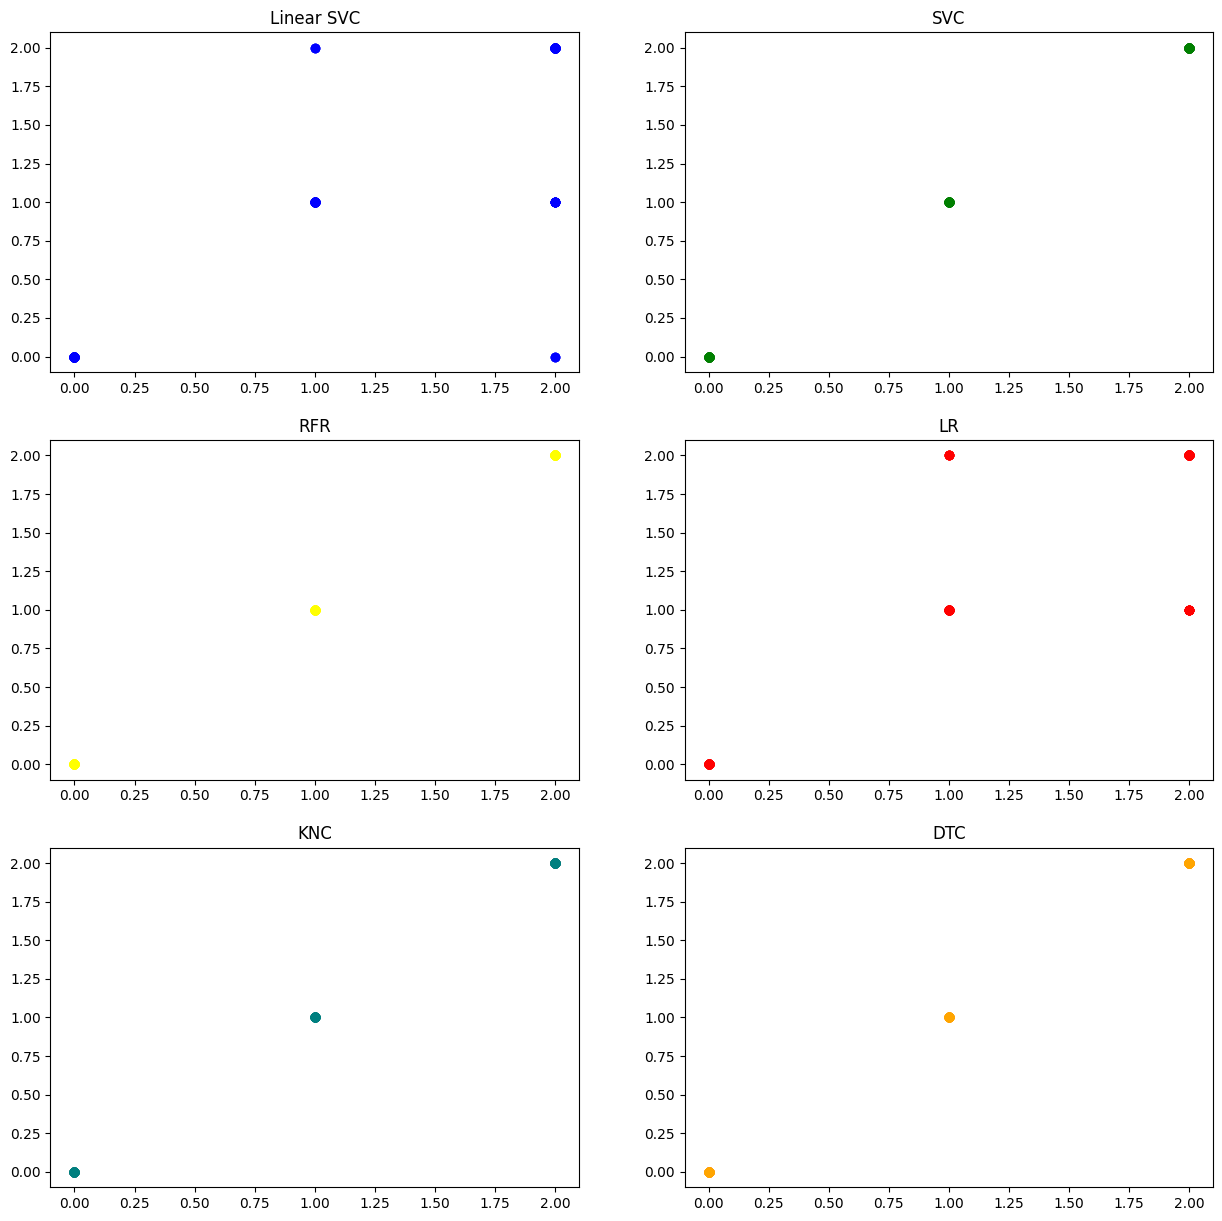

In [105]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0,0].scatter(y_test, lin_svc_preds, color='blue')
axs[0,0].set_title('Linear SVC')

axs[0,1].scatter(y_test, svc_preds, color='green')
axs[0,1].set_title('SVC')

axs[1,0].scatter(y_test, rfr_preds, color='yellow')
axs[1,0].set_title('RFR')

axs[1,1].scatter(y_test, lr_preds, color='red')
axs[1,1].set_title('LR')

axs[2,0].scatter(y_test, knc_preds, color='teal')
axs[2,0].set_title('KNC')

axs[2,1].scatter(y_test, dtc_preds, color='orange')
axs[2,1].set_title('DTC')

plt.show()

In [113]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_preds)
lin_svc_cm = confusion_matrix(y_test, lin_svc_preds)
rfr_cm = confusion_matrix(y_test, rfr_preds)
svc_cm = confusion_matrix(y_test, svc_preds)
knc_cm = confusion_matrix(y_test, knc_preds)
dtc_cm = confusion_matrix(y_test, dtc_preds)

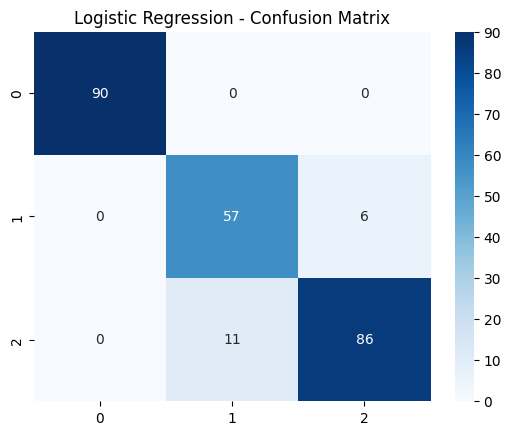

In [119]:
plt.title('Logistic Regression - Confusion Matrix')
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.savefig('../reports/lr_cm.png')
plt.show()

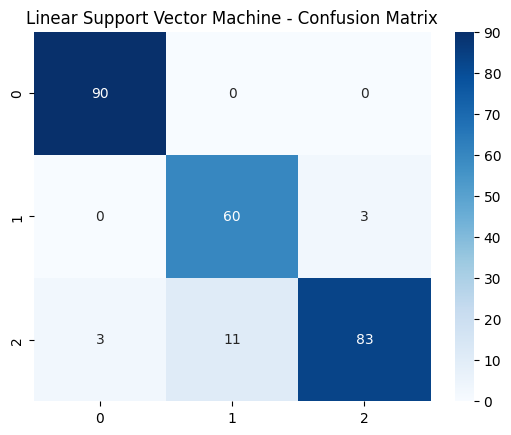

In [120]:
plt.title('Linear Support Vector Machine - Confusion Matrix')
sns.heatmap(lin_svc_cm, annot=True, cmap='Blues', fmt='g')
plt.savefig('../reports/lin_svc_cm.png')
plt.show()

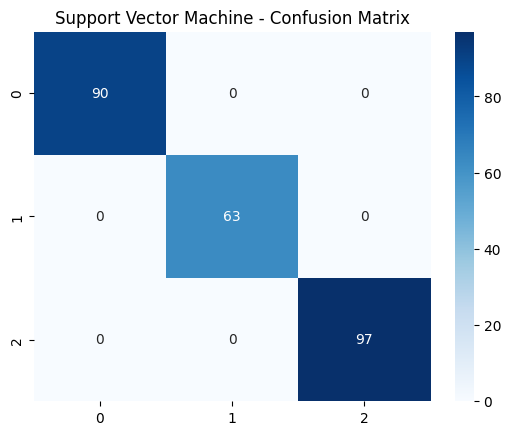

In [121]:
plt.title('Support Vector Machine - Confusion Matrix')
sns.heatmap(svc_cm, annot=True, cmap='Blues', fmt='g')
plt.savefig('../reports/svc_cm.png')
plt.show()

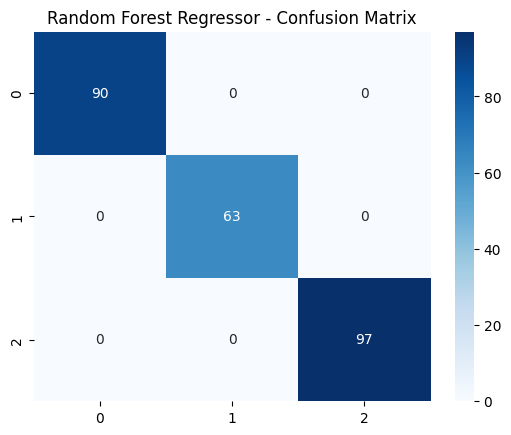

In [122]:
plt.title('Random Forest Regressor - Confusion Matrix')
sns.heatmap(rfr_cm, annot=True, cmap='Blues', fmt='g')
plt.savefig('../reports/rfr_cm.png')
plt.show()

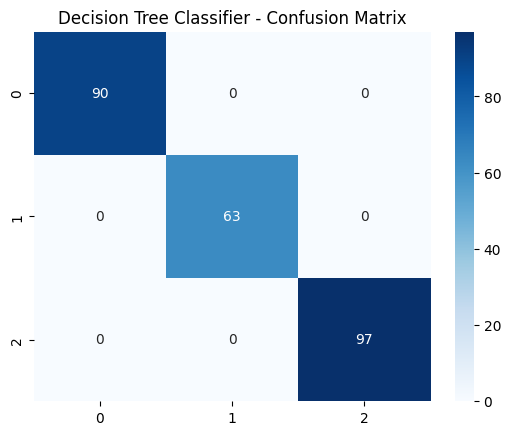

In [123]:
plt.title('Decision Tree Classifier - Confusion Matrix')
sns.heatmap(dtc_cm, annot=True, cmap='Blues', fmt='g')
plt.savefig('../reports/dtc_cm.png')
plt.show()

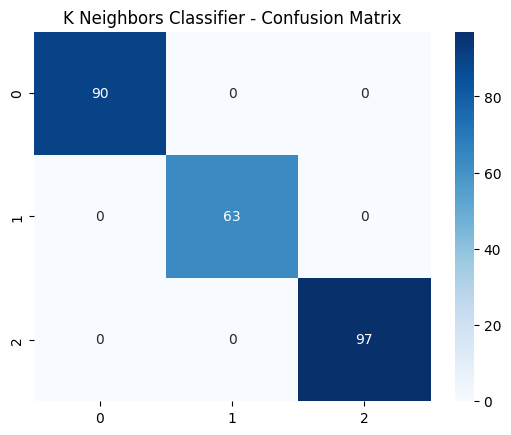

In [124]:
plt.title('K Neighbors Classifier - Confusion Matrix')
sns.heatmap(knc_cm, annot=True, cmap='Blues', fmt='g')
plt.savefig('../reports/knc_cm.png')
plt.show()

## Exporting, Testing and Deploying the Trained Models

In [134]:
# from pickle import dump
# with open('../model/knc_model.pkl', 'wb') as f:
#     dump(knc, f, protocol=5)

In [136]:
from pickle import load
with open('../model/knc_model.pkl', 'rb') as f:
    knc_loaded = load(f)

In [148]:
# # save the fitted scaler
# from pickle import dump
# with open('../model/fitted_std_scaler.pkl', 'wb') as f:
#     dump(std_scaler, f)

In [145]:
def get_value_range(df) -> tuple:
    features_range = {}
    for col in df.columns:
        features_range[col] = (min(df[col]), max(df[col]))

    return features_range

In [146]:
get_value_range(X)

{'Air Pollution': (1, 8),
 'Alcohol use': (1, 8),
 'Dust Allergy': (1, 8),
 'OccuPational Hazards': (1, 8),
 'Genetic Risk': (1, 7),
 'chronic Lung Disease': (1, 7),
 'Balanced Diet': (1, 7),
 'Obesity': (1, 7),
 'Smoking': (1, 8),
 'Passive Smoker': (1, 8),
 'Chest Pain': (1, 9),
 'Coughing of Blood': (1, 9),
 'Fatigue': (1, 9),
 'Dry Cough': (1, 7)}

In [151]:
# load the saved fitted scaler
from pickle import load
with open('../model/fitted_std_scaler.pkl', 'rb') as f:
    std_scaler = load(f)

In [207]:
# # save the fitted label encoder
# from pickle import dump
# with open('../model/fitted_label_encoder.pkl', 'wb') as f:
#     dump(labelencoder, f)

In [208]:
from pickle import load
with open('../model/fitted_label_encoder.pkl', 'rb') as f:
    label_encoder = load(f)

In [236]:
def get_predictions(test_data, model, scaler, encoder):
    return encoder.inverse_transform(model.predict(scaler.transform(test_data)))

In [244]:
import random

feature_values = {'Air Pollution': [random.choice(range(1, 8))], 'Alcohol use': [random.choice(range(1, 8))], 
                  'Dust Allergy': [random.choice(range(1, 8))], 'OccuPational Hazards': [random.choice(range(1, 8))], 
                  'Genetic Risk': [random.choice(range(1, 7))], 'chronic Lung Disease': [random.choice(range(1, 7))], 
                  'Balanced Diet': [random.choice(range(1, 7))], 'Obesity': [random.choice(range(1, 7))], 
                  'Smoking': [random.choice(range(1, 8))], 'Passive Smoker': [random.choice(range(1, 8))], 
                  'Chest Pain': [random.choice(range(1, 9))], 'Coughing of Blood': [random.choice(range(1, 9))], 
                  'Fatigue': [random.choice(range(1, 9))], 'Dry Cough': [random.choice(range(1, 7))]}

In [245]:
test_data = pd.DataFrame(feature_values)

In [246]:
print(f'Lung Cancer Susceptibility: {get_predictions(test_data, knc_loaded, std_scaler, label_encoder)[0]}')

Lung Cancer Susceptibility: Medium
